# Exploratory Data Analysis and Model Creation

# Basic exploration of the data

In [176]:
import pandas as pd
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns
import csv

In [4]:
path = 'https://raw.githubusercontent.com/5ause/league-scrapev2/main/data/highelo/data.csv'
df = pd.read_csv(path)

In [6]:
#  df = pd.read_csv('data.csv')

In [7]:
df.shape

(2088, 232)

In [8]:
df.head()

,gameid,winning_team,100_TOP_avg_game_time,100_TOP_positions_played,100_TOP_avg_kda,100_TOP_avg_kp,100_TOP_avg_vision,100_TOP_avg_cs,100_TOP_goldpm,100_TOP_dmgpm,100_TOP_dmg_to_obj_pm,100_TOP_wr,100_TOP_tier,100_TOP_rank,100_TOP_lp,100_TOP_wins,100_TOP_losses,100_TOP_veteran,100_TOP_inactive,100_TOP_freshblood,100_TOP_hotstreak,100_TOP_role_total_played,100_TOP_role_wr,100_TOP_champ_games_played,100_TOP_champ_winrate,100_JUNGLE_avg_game_time,100_JUNGLE_positions_played,100_JUNGLE_avg_kda,100_JUNGLE_avg_kp,100_JUNGLE_avg_vision,100_JUNGLE_avg_cs,100_JUNGLE_goldpm,100_JUNGLE_dmgpm,100_JUNGLE_dmg_to_obj_pm,100_JUNGLE_wr,100_JUNGLE_tier,100_JUNGLE_rank,100_JUNGLE_lp,100_JUNGLE_wins,100_JUNGLE_losses,...,200_BOTTOM_goldpm,200_BOTTOM_dmgpm,200_BOTTOM_dmg_to_obj_pm,200_BOTTOM_wr,200_BOTTOM_tier,200_BOTTOM_rank,200_BOTTOM_lp,200_BOTTOM_wins,200_BOTTOM_losses,200_BOTTOM_veteran,200_BOTTOM_inactive,200_BOTTOM_freshblood,200_BOTTOM_hotstreak,200_BOTTOM_role_total_played,200_BOTTOM_role_wr,200_BOTTOM_champ_games_played,200_BOTTOM_champ_winrate,200_UTILITY_avg_game_time,200_UTILITY_positions_played,200_UTILITY_avg_kda,200_UTILITY_avg_kp,200_UTILITY_avg_vision,200_UTILITY_avg_cs,200_UTILITY_goldpm,200_UTILITY_dmgpm,200_UTILITY_dmg_to_obj_pm,200_UTILITY_wr,200_UTILITY_tier,200_UTILITY_rank,200_UTILITY_lp,200_UTILITY_wins,200_UTILITY_losses,200_UTILITY_veteran,200_UTILITY_inactive,200_UTILITY_freshblood,200_UTILITY_hotstreak,200_UTILITY_role_total_played,200_UTILITY_role_wr,200_UTILITY_champ_games_played,200_UTILITY_champ_winrate
0,NA1_4144890019,200,23.271667,TOP TOP TOP TOP TOP TOP TOP BOTTOM TOP TOP,2.344102,0.421483,19.9,7.399556,450.255676,660.584402,430.506338,0.5,GRANDMASTER,I,765.0,98.0,82.0,False,False,False,False,168.0,0.553571,4,0.250000,23.598333,JUNGLE JUNGLE JUNGLE JUNGLE JUNGLE JUNGLE JUNG...,6.859524,0.531200,19.2,5.322410,434.695953,580.689314,773.656332,0.5,CHALLENGER,I,1223.0,151.0,91.0,...,444.018576,727.816718,317.008050,0.8,GRANDMASTER,I,852.0,397.0,356.0,True,False,False,False,202.0,0.539604,36,0.555556,25.183333,BOTTOM BOTTOM BOTTOM BOTTOM UTILITY JUNGLE JUN...,3.513095,0.414308,37.1,5.102581,374.791529,439.441429,364.530774,0.4,GRANDMASTER,I,825.0,419.0,389.0,False,False,False,False,616.0,0.524351,25,0.360000
1,NA1_4142559007,200,23.271667,TOP TOP TOP TOP TOP TOP TOP BOTTOM TOP TOP,2.344102,0.421483,19.9,7.399556,450.255676,660.584402,430.506338,0.5,GRANDMASTER,I,765.0,98.0,82.0,False,False,False,False,168.0,0.553571,22,0.500000,24.556667,JUNGLE JUNGLE JUNGLE JUNGLE JUNGLE JUNGLE JUNG...,5.588333,0.545225,20.6,7.452151,471.745622,768.023619,1009.444822,0.5,GRANDMASTER,I,493.0,148.0,112.0,...,482.375967,615.133624,140.509786,0.5,GRANDMASTER,I,495.0,424.0,380.0,True,False,False,False,35.0,0.714286,212,0.570755,28.300000,UTILITY UTILITY UTILITY UTILITY TOP JUNGLE UTI...,1.660960,0.506136,49.5,2.770318,326.858657,471.254417,135.872792,0.1,GRANDMASTER,I,651.0,592.0,507.0,False,False,False,False,941.0,0.547290,25,0.520000
2,NA1_4141413442,200,23.271667,TOP TOP TOP TOP TOP TOP TOP BOTTOM TOP TOP,2.344102,0.421483,19.9,7.399556,450.255676,660.584402,430.506338,0.5,GRANDMASTER,I,765.0,98.0,82.0,False,False,False,False,168.0,0.553571,4,0.250000,23.765000,JUNGLE JUNGLE JUNGLE TOP JUNGLE JUNGLE JUNGLE ...,3.637258,0.420519,20.1,7.317484,450.031559,643.980644,892.699348,0.4,GRANDMASTER,I,502.0,156.0,112.0,...,446.584003,666.117488,441.217850,0.4,GRANDMASTER,I,650.0,613.0,584.0,True,False,False,False,1024.0,0.515625,159,0.515723,27.480000,BOTTOM BOTTOM TOP BOTTOM BOTTOM BOTTOM BOTTOM ...,2.441634,0.507755,28.5,8.155022,502.503639,979.497817,501.419214,0.6,CHALLENGER,I,1387.0,417.0,349.0,True,False,False,False,28.0,0.500000,6,0.833333
3,NA1_4111370048,200,24.110000,MIDDLE TOP TOP TOP TOP TOP TOP TOP TOP TOP,1.912560,0.368992,16.5,6.744090,424.682704,688.888428,230.514309,0.4,CHALLENGER,I,1032.0,719.0,666.0,True,False,False,False,1130.0,0.535398,33,0.575758,26.801667,MIDDLE MIDDLE TOP MIDDLE JUNGLE MIDDLE MIDDLE ...,3.301111,0.386141

# Looking at EVERY variable

I already know which variables are quite correlated with the data. I now want to look at them individually and process them

In [9]:
df.columns

Index(['gameid', 'winning_team', '100_TOP_avg_game_time',
       '100_TOP_positions_played', '100_TOP_avg_kda', '100_TOP_avg_kp',
       '100_TOP_avg_vision', '100_TOP_avg_cs', '100_TOP_goldpm',
       '100_TOP_dmgpm',
       ...
       '200_UTILITY_wins', '200_UTILITY_losses', '200_UTILITY_veteran',
       '200_UTILITY_inactive', '200_UTILITY_freshblood',
       '200_UTILITY_hotstreak', '200_UTILITY_role_total_played',
       '200_UTILITY_role_wr', '200_UTILITY_champ_games_played',
       '200_UTILITY_champ_winrate'],
      dtype='object', length=232)

In [10]:
df[['200_UTILITY_veteran', "200_UTILITY_hotstreak", "200_UTILITY_inactive", "200_UTILITY_freshblood"]].dtypes

200_UTILITY_veteran       object
200_UTILITY_hotstreak     object
200_UTILITY_inactive      object
200_UTILITY_freshblood    object
dtype: object

In [11]:
df[['200_UTILITY_veteran', "200_UTILITY_hotstreak", "200_UTILITY_inactive", "200_UTILITY_freshblood"]].isnull().sum()

200_UTILITY_veteran       123
200_UTILITY_hotstreak     123
200_UTILITY_inactive      123
200_UTILITY_freshblood    123
dtype: int64

In [12]:
def get_variable_names(var):
  lst = []
  for team in ["100", "200"]:
    for role in ["TOP", "MIDDLE", "BOTTOM", "UTILITY", "JUNGLE"]:
      lst.append(team + "_" + role + "_" + var)
  return lst

In [13]:
print(df[get_variable_names("champ_games_played")].isnull().sum())
print(df[get_variable_names("champ_winrate")].isnull().sum())

100_TOP_champ_games_played        0
100_MIDDLE_champ_games_played     0
100_BOTTOM_champ_games_played     0
100_UTILITY_champ_games_played    0
100_JUNGLE_champ_games_played     0
200_TOP_champ_games_played        0
200_MIDDLE_champ_games_played     0
200_BOTTOM_champ_games_played     0
200_UTILITY_champ_games_played    0
200_JUNGLE_champ_games_played     0
dtype: int64
100_TOP_champ_winrate         75
100_MIDDLE_champ_winrate      36
100_BOTTOM_champ_winrate     236
100_UTILITY_champ_winrate     31
100_JUNGLE_champ_winrate     145
200_TOP_champ_winrate         82
200_MIDDLE_champ_winrate      43
200_BOTTOM_champ_winrate     245
200_UTILITY_champ_winrate     29
200_JUNGLE_champ_winrate     150
dtype: int64


In [14]:
lst1 = get_variable_names("champ_winrate")
lst2 = get_variable_names("champ_games_played")

for i in range(0, len(lst1)):
  print("Number of NA's:", df[df[lst1[i]].isnull()][lst2[i]].count())
  print("Max games played:", df[df[lst1[i]].isnull()][lst2[i]].max())

Number of NA's: 75
Max games played: 0
Number of NA's: 36
Max games played: 0
Number of NA's: 236
Max games played: 0
Number of NA's: 31
Max games played: 0
Number of NA's: 145
Max games played: 0
Number of NA's: 82
Max games played: 0
Number of NA's: 43
Max games played: 0
Number of NA's: 245
Max games played: 0
Number of NA's: 29
Max games played: 0
Number of NA's: 150
Max games played: 0


In [15]:
lst1 = get_variable_names("champ_winrate")
lst2 = get_variable_names("champ_games_played")

for i in range(0, len(lst1)):
  print("No. Games Observed:", df[~df[lst1[i]].isnull()][lst2[i]].count())
  print("Min games played:", df[~df[lst1[i]].isnull()][lst2[i]].min())

No. Games Observed: 2013
Min games played: 1
No. Games Observed: 2052
Min games played: 1
No. Games Observed: 1852
Min games played: 1
No. Games Observed: 2057
Min games played: 1
No. Games Observed: 1943
Min games played: 1
No. Games Observed: 2006
Min games played: 1
No. Games Observed: 2045
Min games played: 1
No. Games Observed: 1843
Min games played: 1
No. Games Observed: 2059
Min games played: 1
No. Games Observed: 1938
Min games played: 1


# Notes

I know that all data types were correctly read from the past, I just have to look at the numerical ones, see what is useful and what I can improve on, then look at the categorical/text ones and see if I can do anything about it

Todos:

 - I can make a new variable called winrate, which is wins/max(wins+losses, 1)
 - I have to fill the veteran/hotstreak/freshblood/inactive with boolean values, or an indicator.
 - fill champ_wr with 0.5 and add a new column that indicates if champ_wr was missing.
 - make new vars that measure: the average champion winrate across both teams, and the weighted average champion winrate across both teams.
  - We will simply do sum(gamesplayed*champ_wr)/sum(gamesplayed)??

Notes:
 - I think an observation will be missing all four veteran/hotstreak/freshblood/inactive at a time, due to their ranked info not being found in the API. In that case, I can replace with appropriate values(f/f/t/t) or something.
 - I think what happened with gamesplayed was I auto-filled with 0 if no games were played. I think if no games were played or something in the weighted average we could just average the other values...Like I mean it's summed winrate divided by total games played or something
 - a missing champ winrate probably means that the player didn't play any games on their champion, so we can just fill champ_wr with either their ranked winrate or 0.5(I think 0.5 is more appropriate, because they are new to their champ...?) and not consider it in average champ_wr's.
 - Minimum games played when champ_wr is not missing is 1. Max games played when champ_wr is missing is 0.

# Tasks(EDA, filling missing/outliers, model creation)

## Task 1: Get all missing values

In [26]:
# I've confirmed there are 120 variables with missing values. That is A LOT
# I have to deal with it now
tbl = df.isnull().sum().nlargest(120)
tbl.tail()

100_BOTTOM_role_wr               12
200_UTILITY_role_total_played    12
200_UTILITY_role_wr              12
200_BOTTOM_role_total_played     11
200_BOTTOM_role_wr               11
dtype: int64

In [27]:
tbl.index

Index(['200_BOTTOM_champ_winrate', '100_BOTTOM_champ_winrate',
       '200_JUNGLE_champ_winrate', '100_JUNGLE_champ_winrate',
       '200_JUNGLE_tier', '200_JUNGLE_rank', '200_JUNGLE_lp',
       '200_JUNGLE_wins', '200_JUNGLE_losses', '200_JUNGLE_veteran',
       ...
       '200_MIDDLE_role_total_played', '200_MIDDLE_role_wr',
       '100_TOP_role_total_played', '100_TOP_role_wr',
       '100_BOTTOM_role_total_played', '100_BOTTOM_role_wr',
       '200_UTILITY_role_total_played', '200_UTILITY_role_wr',
       '200_BOTTOM_role_total_played', '200_BOTTOM_role_wr'],
      dtype='object', length=120)

In [28]:
var_set = set()
for val in list(tbl.index):
  var = val.split("_")[2:]
  var = "_".join(var)
  var_set.add(var)

print(var_set)

{'champ_winrate', 'losses', 'role_total_played', 'tier', 'hotstreak', 'role_wr', 'freshblood', 'inactive', 'lp', 'rank', 'veteran', 'wins'}


## Task 2: Explore missing values

Winrates and LP are the only things that are super important. The other variables have logical substitutions that we can make.

 - Champ winrates are reasonable, with means around 53/54%, ranging from 0-1
  - Consider histogramming it to see what's up using concat
 - LP has mean 200, but median 85-90. Probably skewed.
 - We gotta check out wins and losses individually idek anymore...
 - role_total_played is missing cuz they never played anything, can prob sub with 0
 - role wr seems to also be around 53-54%. Maybe sub with mean idk
 - indicator variables can be dealt with logically



 ### Explore Champ WR

In [19]:
summary = df[tbl.index].describe()
summary.loc[["min", "max", "mean", "50%"], :]

,200_BOTTOM_champ_winrate,100_BOTTOM_champ_winrate,200_JUNGLE_champ_winrate,100_JUNGLE_champ_winrate,200_JUNGLE_lp,200_JUNGLE_wins,200_JUNGLE_losses,100_JUNGLE_lp,100_JUNGLE_wins,100_JUNGLE_losses,200_MIDDLE_lp,200_MIDDLE_wins,200_MIDDLE_losses,100_MIDDLE_lp,100_MIDDLE_wins,100_MIDDLE_losses,200_TOP_lp,200_TOP_wins,200_TOP_losses,100_UTILITY_lp,100_UTILITY_wins,100_UTILITY_losses,100_BOTTOM_lp,100_BOTTOM_wins,100_BOTTOM_losses,200_UTILITY_lp,200_UTILITY_wins,200_UTILITY_losses,100_TOP_lp,100_TOP_wins,100_TOP_losses,200_BOTTOM_lp,200_BOTTOM_wins,200_BOTTOM_losses,200_TOP_champ_winrate,100_TOP_champ_winrate,200_MIDDLE_champ_winrate,100_MIDDLE_champ_winrate,100_UTILITY_champ_winrate,200_UTILITY_champ_winrate,200_TOP_role_total_played,200_TOP_role_wr,200_JUNGLE_role_total_played,200_JUNGLE_role_wr,100_UTILITY_role_total_played,100_UTILITY_role_wr,100_JUNGLE_role_total_played,100_JUNGLE_role_wr,100_MIDDLE_role_total_played,100_MIDDLE_role_wr,200_MIDDLE_role_total_played,200_MIDDLE_role_wr,100_TOP_role_total_played,100_TOP_role_wr,100_BOTTOM_role_total_played,100_BOTTOM_role_wr,200_UTILITY_role_total_played,200_UTILITY_role_wr,200_BOTTOM_role_total_played,200_BOTTOM_role_wr
min,0.000000,0.000000,0.000000,0.000000,0.00000,1.0,2.000000,0.000000,1.000000,2.0000,0.000000,1.000000,2.000000,0.000000,1.000000,1.000000,0.00000,2.000000,1.000000,0.000000,3.000000,0.000000,0.000000,2.000000,0.000000,0.000000,2.000000,1.000000,0.000000,2.000000,0.000000,0.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,1.000000,0.000000,1.000000,0.000000,1.000000,0.000000,1.000000,0.000000,1.000000,0.000000,1.00000,0.000000,1.000000,0.000000,1.00000,0.000000,1.000000,0.000000
max,1.000000,1.000000,1.000000,1.000000,1396.00000,2288.0,2269.000000,1396.000000,1808.000000,1808.0000,1547.000000,2017.000000,1982.000000,1470.000000,2017.000000,1968.000000,1378.00000,2213.000000,2170.000000,1368.000000,2213.000000,2170.000000,1547.000000,1995.000000,1951.000000,1470.000000,1992.000000,1982.000000,1750.000000,2213.000000,2170.000000,1451.000000,1862.000000,1855.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,4088.000000,1.000000,3060.000000,1.000000,3947.000000,1.000000,3100.000000,1.000000,3540.000000,1.000000,3540.000000,1.000000,4088.00000,1.000000,3349.000000,1.000000,3947.00000,1.000000,3357.000000,1.000000
mean,0.539656,0.546379,0.541227,0.545682,208.27641,261.6,242.529231,204.760636,279.137878,259.3306,198.851738,290.380879,270.315951,199.087379,295.726111,275.973429,204.23238,322.472421,301.793667,192.716182,324.040327,304.434405,193.013259,314.064253,295.169811,215.082443,320.644275,299.887532,199.258638,320.947154,300.476118,202.145759,311.324022,291.892331,0.530587,0.540943,0.536586,0.544216,0.545243,0.534558,421.859005,0.532343,385.647513,0.541469,393.321429,0.531726,398.003377,0.540292,314.479016,0.534404,305.460203,0.532381,424.01109,0.541011,412.083815,0.536404,398.01975,0.531822,393.719307,0.535525
50%,0.542857,0.545455,0.552174,0.554455,90.00000,157.0,129.000000,85.000000,163.000000,140.0000,89.000000,169.500000,144.000000,85.000000,182.000000,153.000000,89.00000,192.500000,163.000000,81.000000,201.000000,180.000000,90.000000,200.000000,183.000000,93.000000,225.000000,195.000000,84.500000,182.000000,153.000000,94.000000,195.000000,170.000000,0.542452,0.545455,0.551724,0.550000,0.548683,0.543478,166.000000,0.527485,174.000000,0.537071,140.000000,0.526235,166.000000,0.536377,117.000000,0.530457,107.000000,0.529600,166.00000,0.531719,167.000000,0.528470,143.50000,0.526409,156.000000,0.528972


In [20]:
def get_variable_names(var):
  lst = []
  for team in ["100", "200"]:
    for role in ["TOP", "MIDDLE", "BOTTOM", "UTILITY", "JUNGLE"]:
      lst.append(team + "_" + role + "_" + var)
  return lst

(20880,)
1072


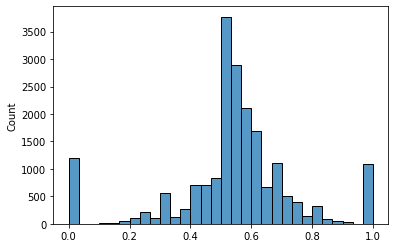

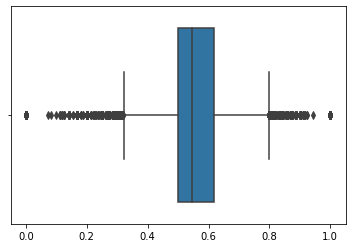

In [21]:
lst = []
for var in get_variable_names("champ_winrate"):
  lst.append(df[var])

champ_winrates = pd.concat(lst, axis=0)

print(champ_winrates.shape)
print(champ_winrates.isnull().sum())

sns.histplot(data=champ_winrates, bins=30)
plt.figure()
sns.boxplot(x=champ_winrates)
plt.show()

Champ winrates
 - has a lot of 0 and 1 values, corresponding to...?
 - typically centered at 0.5.

[0] median: 1.0 count: 1191
[1] median: 1.0 count: 1080


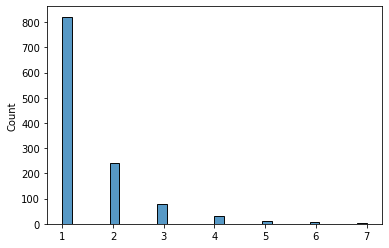

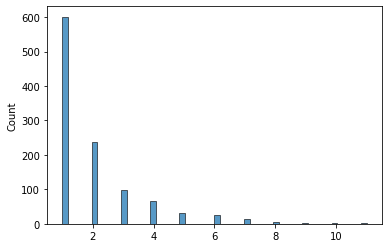

In [22]:
lst0 = []
lst1 = []

for team in ["100", "200"]:
  for role in ["JUNGLE", "TOP", "BOTTOM", "MIDDLE", "UTILITY"]:
    basevar = team + "_" + role + "_"
    var = "champ_winrate"
    var = basevar + var
    tbl = df[df[var] == 0]
    tbl2 = df[df[var] == 1]
    dis = tbl[basevar + "champ_games_played"]
    dis2 = tbl2[basevar + "champ_games_played"]
    lst0.append(dis)
    lst1.append(dis2)
    # print("[0] median:", dis.median(), "count:", dis.count())
    # print("[1] median:", dis2.median(), "count:", dis2.count())

concat = pd.concat(lst0, axis=0)
concat1 = pd.concat(lst1, axis=0)
print("[0] median:", concat.median(), "count:", concat.count())
print("[1] median:", concat1.median(), "count:", concat1.count())
sns.histplot(pd.concat(lst0, axis=0))
plt.figure()
sns.histplot(pd.concat(lst1, axis=0))
plt.show()

[0] median: 2.0 count: 369
[1] median: 3.0 count: 479


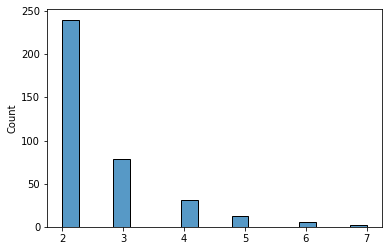

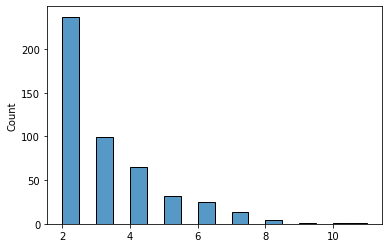

In [23]:
lst0 = []
lst1 = []

for team in ["100", "200"]:
  for role in ["JUNGLE", "TOP", "BOTTOM", "MIDDLE", "UTILITY"]:
    basevar = team + "_" + role + "_"
    var = "champ_winrate"
    var = basevar + var
    othervar = basevar + "champ_games_played"
    tbl = df[(df[var] == 0) & (df[othervar] > 1)]
    tbl2 = df[(df[var] == 1) & (df[othervar] > 1)]
    dis = tbl[othervar]
    dis2 = tbl2[othervar]
    lst0.append(dis)
    lst1.append(dis2)

concat = pd.concat(lst0, axis=0)
concat1 = pd.concat(lst1, axis=0)
print("[0] median:", concat.median(), "count:", concat.count())
print("[1] median:", concat1.median(), "count:", concat1.count())
sns.histplot(pd.concat(lst0, axis=0))
plt.figure()
sns.histplot(pd.concat(lst1, axis=0))
plt.show()

[0] median: 3.0 count: 129
[1] median: 4.0 count: 242


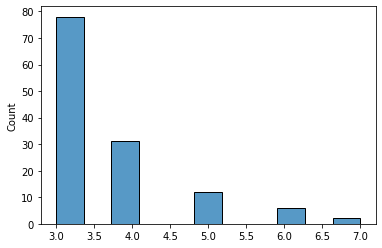

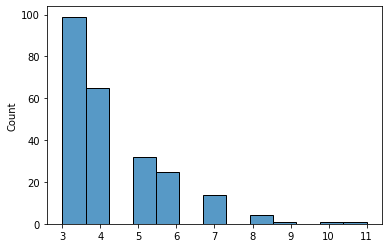

In [24]:
lst0 = []
lst1 = []

for team in ["100", "200"]:
  for role in ["JUNGLE", "TOP", "BOTTOM", "MIDDLE", "UTILITY"]:
    basevar = team + "_" + role + "_"
    var = "champ_winrate"
    var = basevar + var
    othervar = basevar + "champ_games_played"
    tbl = df[(df[var] == 0) & (df[othervar] > 2)]
    tbl2 = df[(df[var] == 1) & (df[othervar] > 2)]
    dis = tbl[othervar]
    dis2 = tbl2[othervar]
    lst0.append(dis)
    lst1.append(dis2)

concat = pd.concat(lst0, axis=0)
concat1 = pd.concat(lst1, axis=0)
print("[0] median:", concat.median(), "count:", concat.count())
print("[1] median:", concat1.median(), "count:", concat1.count())
sns.histplot(pd.concat(lst0, axis=0))
plt.figure()
sns.histplot(pd.concat(lst1, axis=0))
plt.show()

[0] median: 4.0 count: 51
[1] median: 5.0 count: 143


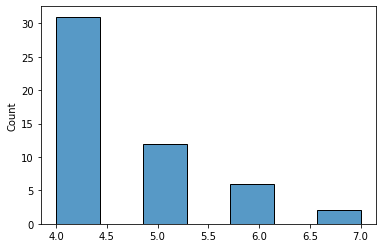

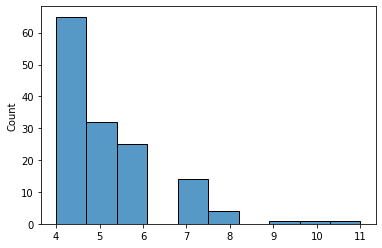

In [25]:
lst0 = []
lst1 = []

for team in ["100", "200"]:
  for role in ["JUNGLE", "TOP", "BOTTOM", "MIDDLE", "UTILITY"]:
    basevar = team + "_" + role + "_"
    var = "champ_winrate"
    var = basevar + var
    othervar = basevar + "champ_games_played"
    tbl = df[(df[var] == 0) & (df[othervar] > 3)]
    tbl2 = df[(df[var] == 1) & (df[othervar] > 3)]
    dis = tbl[othervar]
    dis2 = tbl2[othervar]
    lst0.append(dis)
    lst1.append(dis2)

concat = pd.concat(lst0, axis=0)
concat1 = pd.concat(lst1, axis=0)
print("[0] median:", concat.median(), "count:", concat.count())
print("[1] median:", concat1.median(), "count:", concat1.count())
sns.histplot(pd.concat(lst0, axis=0))
plt.figure()
sns.histplot(pd.concat(lst1, axis=0))
plt.show()

The median games played on a champion is typically 1-2, mostly 1. If one game was played, since we collected the data afterward, it is probably the game where the player lost. we should deal with that.

30-40% of players with >2 games played have winrate 0 or 1, and
10-20% of players with >3 games played have winrate 0 or 1.

Finally, less than 1% of players with >4 games played still have 0 or 100% winrate

We can note that more players have 100% winrate, much of the time, despite having less total observations. This is probably because players are genuinely good, or were smurfing, or something like that.

Ok for the following reasons, I will do 1-2 games we substitute, 3+ we don't:

 - In challenger, being new or first timing stuff should bring the performance of your team way down. Less chance that you get carried or something, or do good, compared to low elo. Thus, we can set the threshold relatively low
 - This can help us detect smurfs. Lots of 100% winrate observations, probably because smurfs were forced off their champ for 1-2 games or something like that. Might be useful.
 - We can do a weighted average of these things, it will probably lower the effect of outliers like these.

### Explore LP

median: 89.0 count: 19594


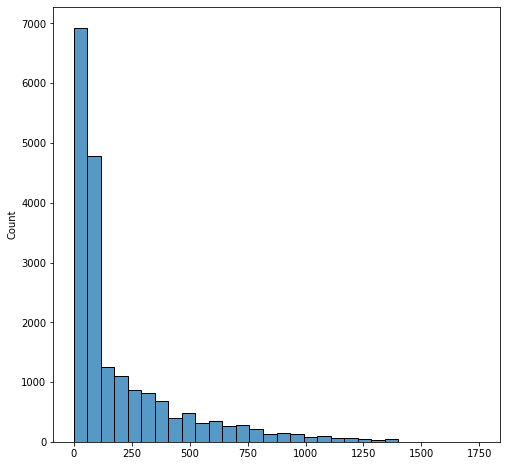

In [34]:
lst = []

for team in ["100", "200"]:
  for role in ["JUNGLE", "TOP", "BOTTOM", "MIDDLE", "UTILITY"]:
    basevar = team + "_" + role + "_"
    var = "lp"
    var = basevar + var
    lst.append(df[var])

concat = pd.concat(lst, axis=0)
print("median:", concat.median(), "count:", concat.count())
plt.subplots(figsize=(8,8))
sns.histplot(pd.concat(lst, axis=0), bins=30)
plt.show()

In [35]:
lst = []

for team in ["100", "200"]:
  for role in ["JUNGLE", "TOP", "BOTTOM", "MIDDLE", "UTILITY"]:
    basevar = team + "_" + role + "_"
    var = "lp"
    var = basevar + var
    thing = df[df[var] == 0]
    lst.append(thing[var])

concat = pd.concat(lst, axis=0)
print("count:", concat.count())

count: 852


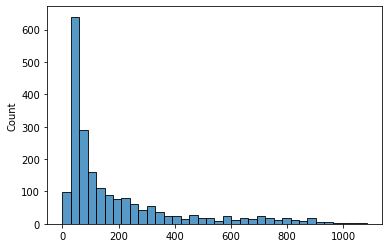

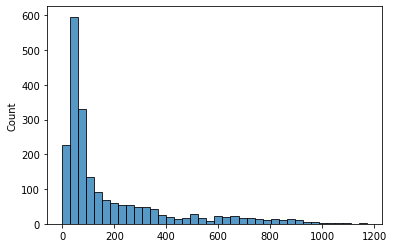

In [39]:
lst = []

for team in ["100", "200"]:
  for role in ["JUNGLE", "TOP", "BOTTOM", "MIDDLE", "UTILITY"]:
    basevar = team + "_" + role + "_"
    var = "lp"
    var = basevar + var
    lst.append(var)

average_lp = df[lst].mean(axis=1)
median_lp = df[lst].median(axis=1)
sns.histplot(average_lp)
plt.figure()
sns.histplot(median_lp)

In [40]:
average_lp.describe()

count    2074.000000
mean      193.320790
std       219.809494
min         0.000000
25%        48.525000
50%        92.500000
75%       244.250000
max      1082.400000
dtype: float64

In [41]:
median_lp.describe()

count    2074.000000
mean      185.419479
std       222.668220
min         0.000000
25%        46.500000
50%        78.000000
75%       245.500000
max      1171.500000
dtype: float64

The logical answer is probably to fill with 0: if they don't have a recorded lp, then they should just be recorded as a new player I guess. I don't want to fill with a value when I don't really understand the implications of that, just because I want to correct...idek what I'm trying to correct

### Exploring Role Winrate and total played

median: 0.53012048192771 count: 20736


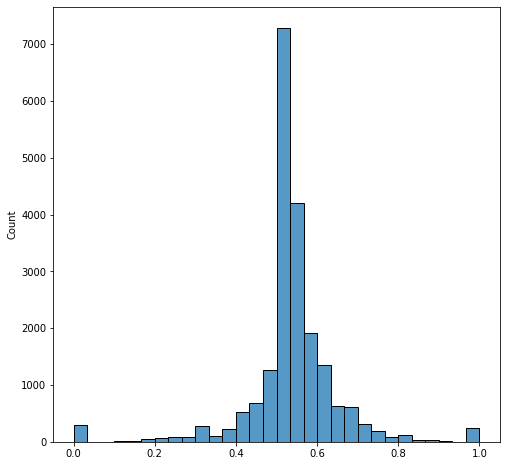

In [42]:
lst = []

for team in ["100", "200"]:
  for role in ["JUNGLE", "TOP", "BOTTOM", "MIDDLE", "UTILITY"]:
    basevar = team + "_" + role + "_"
    var = "role_wr"
    var = basevar + var
    lst.append(df[var])

concat = pd.concat(lst, axis=0)
print("median:", concat.median(), "count:", concat.count())
plt.subplots(figsize=(8,8))
sns.histplot(pd.concat(lst, axis=0), bins=30)
plt.show()

median: 149.0 count: 20736


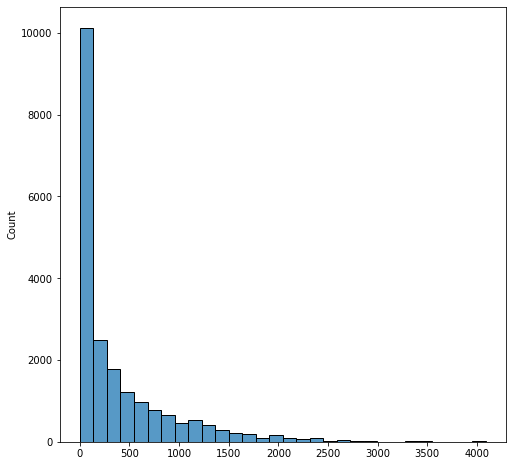

In [43]:
lst = []

for team in ["100", "200"]:
  for role in ["JUNGLE", "TOP", "BOTTOM", "MIDDLE", "UTILITY"]:
    basevar = team + "_" + role + "_"
    var = "role_total_played"
    var = basevar + var
    lst.append(df[var])

concat = pd.concat(lst, axis=0)
print("median:", concat.median(), "count:", concat.count())
plt.subplots(figsize=(8,8))
sns.histplot(pd.concat(lst, axis=0), bins=30)
plt.show()

median: 0.5 count: 4077


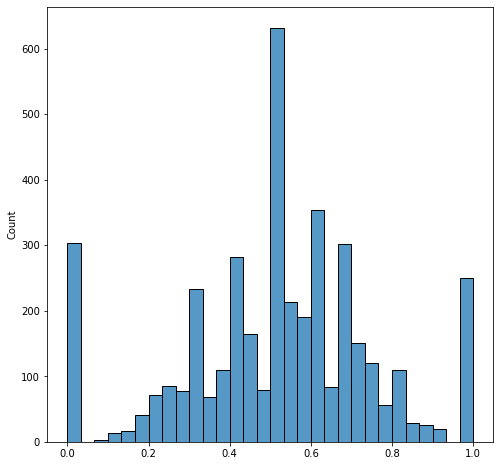

In [44]:
lst = []

for team in ["100", "200"]:
  for role in ["JUNGLE", "TOP", "BOTTOM", "MIDDLE", "UTILITY"]:
    basevar = team + "_" + role + "_"
    var = "role_wr"
    var = basevar + var
    append_df = df[df[basevar + "role_total_played"] < 25]
    lst.append(append_df[var])

concat = pd.concat(lst, axis=0)
print("median:", concat.median(), "count:", concat.count())
plt.subplots(figsize=(8,8))
sns.histplot(pd.concat(lst, axis=0), bins=30)
plt.show()

role wr has much fewer outliers at 0 and 1, probably because roles are more commonly played than champions. I don't want to do more processing, I think I will fill with median, and yeah.

## Task 3: Fill missing values(can run notebook starting from task3)

We are missing the following:


{'lp', 'wins', 'role_wr', 'hotstreak', 'role_total_played', 'freshblood', 'rank', 'inactive', 'losses', 'tier', 'veteran', 'champ_winrate'}

We will fill accordingly:
 - LP: fill with 0
 - wins/losses: fill with 0
 - champ_winrate: 1-2games sub with median of ALL champ_wr's, 3+ don't change
 - role_total_played fill with 0
 - role_wr: fill with median probably
 - hotstreak, freshblood, inactive, veteran: fill logically
 - rank + tier: ignore for now.

 If I sub with the median of a variable across both teams and roles, the larger distribution of winrates and such should lead to a better estimation of median winrate or whatever.

In [177]:
# THIS CODE CAN BE RUN STARTING FROM THIS SECTION\
path = 'https://raw.githubusercontent.com/5ause/league-scrapev2/main/data/highelo/data.csv'
df = pd.read_csv(path)

In [178]:
def get_variable_names(var):
  lst = []
  for team in ["100", "200"]:
    for role in ["TOP", "MIDDLE", "BOTTOM", "UTILITY", "JUNGLE"]:
      lst.append(team + "_" + role + "_" + var)
  return lst

### LP, wins/losses

In [179]:
# LP
for var in get_variable_names("lp"):
  df[var].fillna(0, inplace=True)

In [180]:
df["100_BOTTOM_lp"].isnull().sum()

0

In [181]:
# wins/losses
for var in get_variable_names("wins"):
  df[var].fillna(0, inplace=True)

for var in get_variable_names("losses"):
  df[var].fillna(0, inplace=True)

In [182]:
df["200_TOP_losses"].isnull().sum()

0

### hotstreak, veteran, inactive, freshblood

cast boolean then process

In [183]:
df["100_TOP_veteran"].value_counts()

False    1616
True      352
Name: 100_TOP_veteran, dtype: int64

In [184]:
df["100_TOP_veteran"].isnull().sum()

120

In [185]:
false_lst = get_variable_names("veteran") + get_variable_names("hotstreak")
true_lst = get_variable_names("inactive") + get_variable_names("freshblood")

In [186]:
for var in false_lst:
  df[var].fillna("False", inplace=True)

for var in true_lst:
  df[var].fillna("True", inplace=True)

In [187]:
for var in false_lst + true_lst:
  df[var] = df[var].astype(bool)

In [188]:
df["100_TOP_veteran"].dtypes

dtype('bool')

In [189]:
df["100_TOP_veteran"].isnull().sum()

0

### Champ wr

Should probably have aggregated all champ_wr data to calculate median...UGH

In [190]:
# CHAMP WR(the hard one)
####################################################################
# TEST CODE ########################################################
####################################################################


# df_copy = df.copy()
# med = df["100_BOTTOM_champ_winrate"].median()
# idx = (df_copy["100_BOTTOM_champ_games_played"] < 3) & (df_copy["100_BOTTOM_champ_winrate"] == 0)
# idx2 = (df_copy["100_BOTTOM_champ_games_played"] < 3) & (df_copy["100_BOTTOM_champ_winrate"] == 1)
# df_copy.loc[idx, "100_BOTTOM_champ_winrate"] = med
# df_copy.loc[idx2, "100_BOTTOM_champ_winrate"] = med
# df_copy["100_BOTTOM_champ_winrate"].fillna(med, inplace=True)

# df_copy["100_BOTTOM_champ_winrate"].isnull().sum()
# sns.histplot(df_copy["100_BOTTOM_champ_winrate"])

In [191]:
for team in ["100", "200"]:
  for position in ["TOP", "BOTTOM", "MIDDLE", "JUNGLE", "UTILITY"]:
    var1 = team + "_" + position + "_champ_winrate"
    var2 = team + "_" + position + "_champ_games_played"
    med = df[var1].median()
    idx = (df[var2] < 3) & (df[var1] == 0)
    idx2 = (df[var2] < 3) & (df[var1] == 1)
    df.loc[idx, var1] = med
    df.loc[idx2, var1] = med
    df[var1].fillna(med, inplace=True)

In [192]:
for var in get_variable_names("champ_winrate"):
  print(df[var].isnull().sum())

0
0
0
0
0
0
0
0
0
0


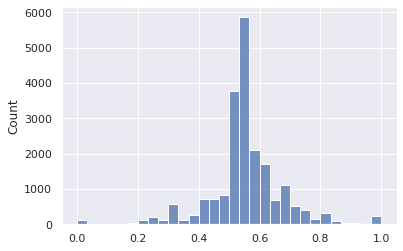

In [193]:
lst = []
for var in get_variable_names("champ_winrate"):
  lst.append(df[var])

sns.histplot(pd.concat(lst, axis=0), bins=30)

this looks much better than before, and there's logic behind the transformation, so it's good :D 

### role total played/wr

In [194]:
for var in get_variable_names("role_total_played"):
  df[var].fillna(0, inplace=True)

In [195]:
lst = []
for var in get_variable_names("role_wr"):
  lst.append(df[var])

role_wr = pd.concat(lst, axis=0)
role_wr_median = role_wr.median()
print("Median is:", role_wr_median)

for var in get_variable_names("role_wr"):
  df[var].fillna(role_wr_median, inplace=True)

Median is: 0.53012048192771


### Winning Team

In [196]:
df["winning_team"].dtypes

dtype('int64')

In [197]:
df["winning_team"]

0       200
1       200
2       200
3       200
4       100
       ... 
2083    100
2084    200
2085    200
2086    200
2087    100
Name: winning_team, Length: 2088, dtype: int64

In [198]:
df["winning_team"] = df["winning_team"].apply(lambda x: int(x/100 - 1))

In [199]:
df["winning_team"]

0       1
1       1
2       1
3       1
4       0
       ..
2083    0
2084    1
2085    1
2086    1
2087    0
Name: winning_team, Length: 2088, dtype: int64

red --> 200 --> 1, blue --> 100 --> 0

### Rank + tier(drop columns)

In [200]:
for var in get_variable_names("rank") + get_variable_names("tier"):
  df.drop(var, axis=1, inplace=True)

In [201]:
tbl = df.isnull().sum().nlargest(120)
tbl.head(21)

gameid                       0
winning_team                 0
100_TOP_avg_game_time        0
100_TOP_positions_played     0
100_TOP_avg_kda              0
100_TOP_avg_kp               0
100_TOP_avg_vision           0
100_TOP_avg_cs               0
100_TOP_goldpm               0
100_TOP_dmgpm                0
100_TOP_dmg_to_obj_pm        0
100_TOP_wr                   0
100_TOP_lp                   0
100_TOP_wins                 0
100_TOP_losses               0
100_TOP_veteran              0
100_TOP_inactive             0
100_TOP_freshblood           0
100_TOP_hotstreak            0
100_TOP_role_total_played    0
100_TOP_role_wr              0
dtype: int64

In [202]:
df.head()

,gameid,winning_team,100_TOP_avg_game_time,100_TOP_positions_played,100_TOP_avg_kda,100_TOP_avg_kp,100_TOP_avg_vision,100_TOP_avg_cs,100_TOP_goldpm,100_TOP_dmgpm,100_TOP_dmg_to_obj_pm,100_TOP_wr,100_TOP_lp,100_TOP_wins,100_TOP_losses,100_TOP_veteran,100_TOP_inactive,100_TOP_freshblood,100_TOP_hotstreak,100_TOP_role_total_played,100_TOP_role_wr,100_TOP_champ_games_played,100_TOP_champ_winrate,100_JUNGLE_avg_game_time,100_JUNGLE_positions_played,100_JUNGLE_avg_kda,100_JUNGLE_avg_kp,100_JUNGLE_avg_vision,100_JUNGLE_avg_cs,100_JUNGLE_goldpm,100_JUNGLE_dmgpm,100_JUNGLE_dmg_to_obj_pm,100_JUNGLE_wr,100_JUNGLE_lp,100_JUNGLE_wins,100_JUNGLE_losses,100_JUNGLE_veteran,100_JUNGLE_inactive,100_JUNGLE_freshblood,100_JUNGLE_hotstreak,...,200_BOTTOM_avg_kda,200_BOTTOM_avg_kp,200_BOTTOM_avg_vision,200_BOTTOM_avg_cs,200_BOTTOM_goldpm,200_BOTTOM_dmgpm,200_BOTTOM_dmg_to_obj_pm,200_BOTTOM_wr,200_BOTTOM_lp,200_BOTTOM_wins,200_BOTTOM_losses,200_BOTTOM_veteran,200_BOTTOM_inactive,200_BOTTOM_freshblood,200_BOTTOM_hotstreak,200_BOTTOM_role_total_played,200_BOTTOM_role_wr,200_BOTTOM_champ_games_played,200_BOTTOM_champ_winrate,200_UTILITY_avg_game_time,200_UTILITY_positions_played,200_UTILITY_avg_kda,200_UTILITY_avg_kp,200_UTILITY_avg_vision,200_UTILITY_avg_cs,200_UTILITY_goldpm,200_UTILITY_dmgpm,200_UTILITY_dmg_to_obj_pm,200_UTILITY_wr,200_UTILITY_lp,200_UTILITY_wins,200_UTILITY_losses,200_UTILITY_veteran,200_UTILITY_inactive,200_UTILITY_freshblood,200_UTILITY_hotstreak,200_UTILITY_role_total_played,200_UTILITY_role_wr,200_UTILITY_champ_games_played,200_UTILITY_champ_winrate
0,NA1_4144890019,1,23.271667,TOP TOP TOP TOP TOP TOP TOP BOTTOM TOP TOP,2.344102,0.421483,19.9,7.399556,450.255676,660.584402,430.506338,0.5,765.0,98.0,82.0,False,False,False,False,168.0,0.553571,4,0.250000,23.598333,JUNGLE JUNGLE JUNGLE JUNGLE JUNGLE JUNGLE JUNG...,6.859524,0.531200,19.2,5.322410,434.695953,580.689314,773.656332,0.5,1223.0,151.0,91.0,False,False,False,False,...,3.846190,0.388899,22.1,7.173994,444.018576,727.816718,317.008050,0.8,852.0,397.0,356.0,True,False,False,False,202.0,0.539604,36,0.555556,25.183333,BOTTOM BOTTOM BOTTOM BOTTOM UTILITY JUNGLE JUN...,3.513095,0.414308,37.1,5.102581,374.791529,439.441429,364.530774,0.4,825.0,419.0,389.0,False,False,False,False,616.0,0.524351,25,0.360000
1,NA1_4142559007,1,23.271667,TOP TOP TOP TOP TOP TOP TOP BOTTOM TOP TOP,2.344102,0.421483,19.9,7.399556,450.255676,660.584402,430.506338,0.5,765.0,98.0,82.0,False,False,False,False,168.0,0.553571,22,0.500000,24.556667,JUNGLE JUNGLE JUNGLE JUNGLE JUNGLE JUNGLE JUNG...,5.588333,0.545225,20.6,7.452151,471.745622,768.023619,1009.444822,0.5,493.0,148.0,112.0,False,False,False,False,...,3.125714,0.503136,16.9,4.907991,482.375967,615.133624,140.509786,0.5,495.0,424.0,380.0,True,False,False,False,35.0,0.714286,212,0.570755,28.300000,UTILITY UTILITY UTILITY UTILITY TOP JUNGLE UTI...,1.660960,0.506136,49.5,2.770318,326.858657,471.254417,135.872792,0.1,651.0,592.0,507.0,False,False,False,False,941.0,0.547290,25,0.520000
2,NA1_4141413442,1,23.271667,TOP TOP TOP TOP TOP TOP TOP BOTTOM TOP TOP,2.344102,0.421483,19.9,7.399556,450.255676,660.584402,430.506338,0.5,765.0,98.0,82.0,False,False,False,False,168.0,0.553571,4,0.250000,23.765000,JUNGLE JUNGLE JUNGLE TOP JUNGLE JUNGLE JUNGLE ...,3.637258,0.420519,20.1,7.317484,450.031559,643.980644,892.699348,0.4,502.0,156.0,112.0,False,False,False,False,...,4.334167,0.589376,28.6,7.708551,446.584003,666.117488,441.217850,0.4,650.0,613.0,584.0,True,False,False,False,1024.0,0.515625,159,0.515723,27.480000,BOTTOM BOTTOM TOP BOTTOM BOTTOM BOTTOM BOTTOM ...,2.441634,0.507755,28.5,8.155022,502.503639,979.497817,501.419214,0.6,1387.0,417.0,349.0,True,False,False,False,28.0,0.500000,6,0.833333
3,NA1_4111370048,1,24.110000,MIDDLE TOP TOP TOP TOP TOP TOP TOP TOP TOP,1.912560,0.368992,16.5,6.744090,424.682704,688.888428,230.514309,0.4,1032.0,719.0,666.0,True,False,False,False,1130.0,0.535398,33,0.575758,26.801667,MIDDLE MIDDLE TOP MIDDLE JUNGLE MIDDLE MIDDLE ...,3

FILLING MISSING DATA AND OTHER PROCESSING IS NOW DONE!!

## Task 4 create new variables

- winrate
- average_champ_winrate, winrate, role_winrate

### Winrate

In [203]:
for team in ["100", "200"]:
  for role in ["TOP", "JUNGLE", "BOTTOM", "MIDDLE", "UTILITY"]:
    basevar = team + "_" + role + "_"
    wr_var = basevar + "ranked_winrate"
    w_var = basevar + "wins"
    l_var = basevar + "losses"
    df[wr_var] = df[w_var] / (df[w_var] + df[l_var])

In [204]:
tbl = df.isnull().sum().nlargest(120)
tbl.head(21)

200_JUNGLE_ranked_winrate     138
100_JUNGLE_ranked_winrate     137
200_MIDDLE_ranked_winrate     132
100_MIDDLE_ranked_winrate     131
200_TOP_ranked_winrate        130
100_UTILITY_ranked_winrate    129
100_BOTTOM_ranked_winrate     127
200_UTILITY_ranked_winrate    123
100_TOP_ranked_winrate        120
200_BOTTOM_ranked_winrate     119
gameid                          0
winning_team                    0
100_TOP_avg_game_time           0
100_TOP_positions_played        0
100_TOP_avg_kda                 0
100_TOP_avg_kp                  0
100_TOP_avg_vision              0
100_TOP_avg_cs                  0
100_TOP_goldpm                  0
100_TOP_dmgpm                   0
100_TOP_dmg_to_obj_pm           0
dtype: int64

In [205]:
lst = []
for a in get_variable_names("ranked_winrate"):
  lst.append(df[a])

med = pd.concat(lst).median()

In [206]:
# Filling with median winrate is best, I don't think we should assume if someone has
# no ranked history they'd automatically have like 0 ranked winrate you know...
for a in get_variable_names("ranked_winrate"):
  df[a].fillna(med, inplace=True)

### average_champ_winrate

In [207]:
def get_variable_names_t(team, var):
  lst = []
  for role in ["JUNGLE", "MIDDLE", "TOP", "BOTTOM", "UTILITY"]:
    lst.append(team + "_" + role + "_" + var)
  return lst

In [208]:
# there are no missing values, so we can just do avg of the stuff

lst1 = []
lst2 = []
for var in get_variable_names_t("100", "champ_winrate"):
  lst1.append(df[var])
for var in get_variable_names_t("200", "champ_winrate"):
  lst2.append(df[var])

avg_champ_winrate1 = pd.concat(lst1, axis=1).mean(axis=1)
avg_champ_winrate2 = pd.concat(lst2, axis=1).mean(axis=1)

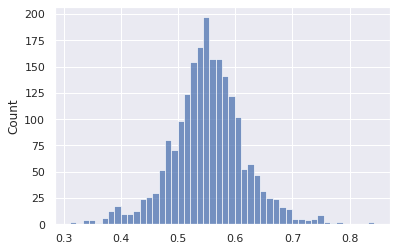

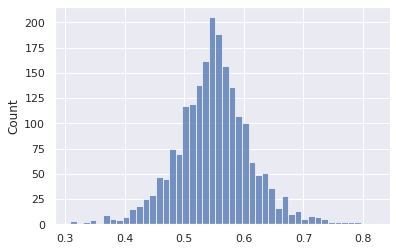

In [209]:
sns.histplot(avg_champ_winrate1)
plt.figure()
sns.histplot(avg_champ_winrate2)

In [210]:
print(avg_champ_winrate1.mean(), avg_champ_winrate2.mean())

0.5516044835923329 0.5493794885834691


In [211]:
type(avg_champ_winrate1)

pandas.core.series.Series

In [212]:
df["100_avg_champ_winrate"] = avg_champ_winrate1
df["200_avg_champ_winrate"] = avg_champ_winrate2

In [213]:
tbl = df.isnull().sum().nlargest(120)
tbl.head(21)

gameid                       0
winning_team                 0
100_TOP_avg_game_time        0
100_TOP_positions_played     0
100_TOP_avg_kda              0
100_TOP_avg_kp               0
100_TOP_avg_vision           0
100_TOP_avg_cs               0
100_TOP_goldpm               0
100_TOP_dmgpm                0
100_TOP_dmg_to_obj_pm        0
100_TOP_wr                   0
100_TOP_lp                   0
100_TOP_wins                 0
100_TOP_losses               0
100_TOP_veteran              0
100_TOP_inactive             0
100_TOP_freshblood           0
100_TOP_hotstreak            0
100_TOP_role_total_played    0
100_TOP_role_wr              0
dtype: int64

### Average_role_wr

In [214]:
lst1 = []
lst2 = []
for var in get_variable_names_t("100", "role_wr"):
  lst1.append(df[var])
for var in get_variable_names_t("200", "role_wr"):
  lst2.append(df[var])

avg_role_winrate1 = pd.concat(lst1, axis=1).mean(axis=1)
avg_role_winrate2 = pd.concat(lst2, axis=1).mean(axis=1)

In [215]:
df["100_avg_role_wr"] = avg_role_winrate1
df["200_avg_role_wr"] = avg_role_winrate2

In [216]:
tbl = df.isnull().sum().nlargest(20)
tbl.head()

gameid                      0
winning_team                0
100_TOP_avg_game_time       0
100_TOP_positions_played    0
100_TOP_avg_kda             0
dtype: int64

## Task 5 Visualize a bit, correlation heatmap and stuff

Super proud of myself, these new variables that I made are really good.

### Correlation Matrix

In [217]:
corrmat = df.corr().abs()

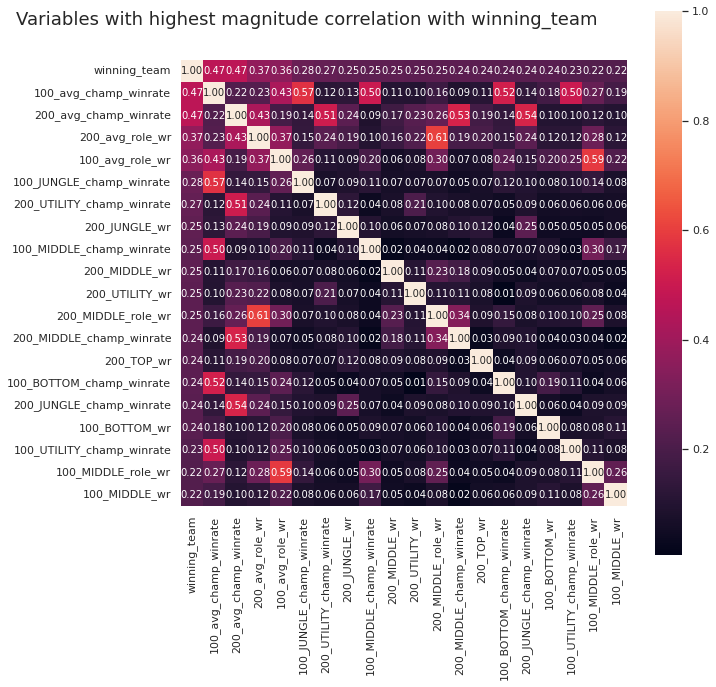

In [313]:
k = 20
cols = corrmat.nlargest(k, "winning_team")["winning_team"].index
df_conv = df[cols].astype(float)

cm = np.absolute(np.corrcoef(df_conv[cols].values.T))

sns.set(font_scale=1)
f = plt.figure(figsize=(10, 10))
hm = sns.heatmap(cm, cbar=True, annot=True, square=True, fmt='.2f', annot_kws={'size':10}, 
                 yticklabels=cols.values, xticklabels=cols.values)

f.suptitle("Variables with highest magnitude correlation with winning_team", fontsize="18", x=0.3, y=0.88)
plt.show()

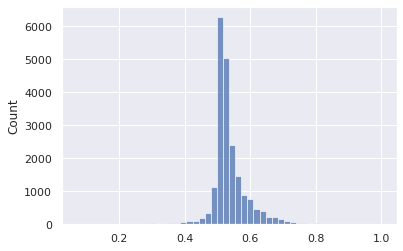

In [147]:
lst = []
for a in get_variable_names("ranked_winrate"):
  lst.append(df[a])

sns.histplot(pd.concat(lst), bins=50)

In [149]:
a = get_variable_names("ranked_winrate") + ["winning_team"]

df[a].corr()["winning_team"]

100_TOP_ranked_winrate       -0.107596
100_MIDDLE_ranked_winrate    -0.108873
100_BOTTOM_ranked_winrate    -0.110252
100_UTILITY_ranked_winrate   -0.048290
100_JUNGLE_ranked_winrate    -0.098617
200_TOP_ranked_winrate        0.064247
200_MIDDLE_ranked_winrate     0.104676
200_BOTTOM_ranked_winrate     0.087969
200_UTILITY_ranked_winrate    0.109400
200_JUNGLE_ranked_winrate     0.104241
winning_team                  1.000000
Name: winning_team, dtype: float64

its seems that the ranked_winrate variable wasn't that useful.

A lot of the champ_winrates are correlated with the average champion winrate. I don't think it's like a confounding factor, because maybe certain roles are more impactful and it would be useful to know the champ winrates for individual players/roles.

### Champ_winrate boxplot

Here's a widget that allows you to plot certain champ_winrate variables to see the difference based on the winning team.

In [314]:
from IPython.display import clear_output, display
import ipywidgets as widgets

In [315]:
def get_variable_names(var):
  lst = []
  for team in ["100", "200"]:
    for role in ["TOP", "MIDDLE", "BOTTOM", "UTILITY", "JUNGLE"]:
      lst.append(team + "_" + role + "_" + var)
  return lst

In [318]:
df2 = df.copy()
df2["winning_team"] = df2["winning_team"].apply(lambda x: int((x+1)*100))

Dropdown(description='Var:', index=10, options=('100_TOP_champ_winrate', '100_MIDDLE_champ_winrate', '100_BOTT…

Dropdown(description='Plot type: ', options=('boxplot', 'histogram'), value='boxplot')

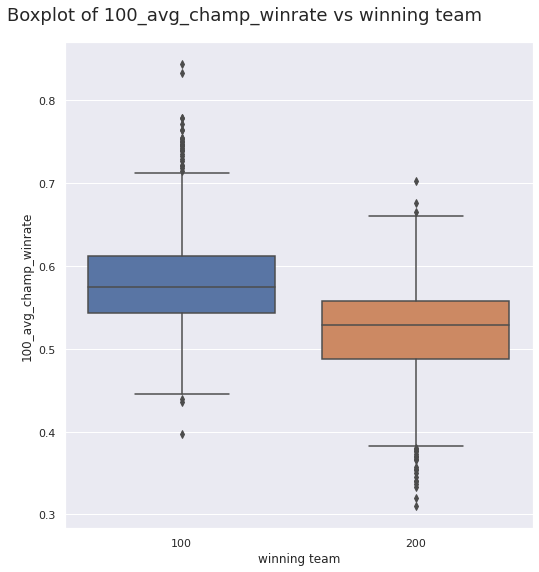

In [370]:
def add_widgets(var, plot_type):
  var_widget = widgets.Dropdown(
      options=get_variable_names("champ_winrate") + ["100_avg_champ_winrate", "200_avg_champ_winrate", "100_avg_role_wr", "200_avg_role_wr"],
      value=var,
      description='Var:',
  )
  
  plot_widget = widgets.Dropdown(
      options=["boxplot", "histogram"],
      value=plot_type,
      description='Plot type: '
  )

  plot_widget.observe(lambda d: plot(var_widget.value, d['new']), 'value')
  var_widget.observe(lambda d: plot(d['new'], plot_widget.value), 'value')
  display(var_widget)
  display(plot_widget)

def plot(var, plot_type):
  clear_output()
  add_widgets(var, plot_type)
  if plot_type == "boxplot":
    f = plt.figure(figsize=(10, 10))
    sns.boxplot(x="winning_team", y=var, data=df2)
    f.suptitle("Boxplot of " + var + " vs winning team", fontsize="18", x=0.5, y=0.85)
    plt.subplots_adjust(top=0.8, left=0.25)
    plt.ylabel(var)
    plt.xlabel("winning team")
  if plot_type == "histogram":
    f, axs = plt.subplots(nrows=1, ncols=2, figsize=(10, 10))
    plt.subplot(1, 2, 1)
    data1 = df2[df2["winning_team"] == 100]
    ax1 = sns.histplot(data1[var])
    ax1.set_title("winning team 100")
    data2 = df2[df2["winning_team"] == 200]
    plt.subplot(1, 2, 2)
    ax2 = sns.histplot(data2[var])
    f.suptitle("Histograms of " + var + " based on winning team", fontsize="18", x=0.5, y=0.85)
    ax2.set_title("winning team 200")
    plt.subplots_adjust(top=0.75)
  plt.show()
  
plot("100_avg_champ_winrate", "histogram")

## Task 6 Get ready for model

don't forget to train test split and use k-fold validation

In [354]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import RandomizedSearchCV, GridSearchCV
from sklearn import metrics
from sklearn.model_selection import train_test_split

In [355]:
object_type = df.dtypes == object
indexes_to_drop = object_type[object_type == True].index

In [356]:
y = df["winning_team"]
x = df.drop("winning_team", axis=1)
x.drop(indexes_to_drop, axis=1, inplace=True)

In [357]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.33, random_state=42)

## Randomized/Grid search CV + model creation

Try making different parameters, using higher cross-validation. I don't think min_samples_leaf and min_samples_split make sense to be under 1...

I think using ROC AUC to evaluate the model is fine.

In [261]:
n_estimators_list = list(range(10, 300, 40))
criterion_list = ["gini", "entropy"]
max_depth_list = list(range(5, 41, 10))
max_depth_list.append(None)
min_samples_split_list = [x/1000 for x in list(range(5, 41, 5))]
min_samples_leaf_list = [x/1000 for x in list(range(5, 41, 5))]
max_features_list = ["sqrt", "log2"]

params_grid = {
    'n_estimators': n_estimators_list,
    'criterion': criterion_list,
    'max_depth': max_depth_list,
    'min_samples_split': min_samples_split_list,
    'min_samples_leaf': min_samples_leaf_list,
    'max_features': max_features_list
}

num_combinations = 1
for k in params_grid.keys():
  num_combinations *= len(params_grid[k])

print("number of combinations:", num_combinations)
params_grid

number of combinations: 10240


{'criterion': ['gini', 'entropy'],
 'max_depth': [5, 15, 25, 35, None],
 'max_features': ['sqrt', 'log2'],
 'min_samples_leaf': [0.005, 0.01, 0.015, 0.02, 0.025, 0.03, 0.035, 0.04],
 'min_samples_split': [0.005, 0.01, 0.015, 0.02, 0.025, 0.03, 0.035, 0.04],
 'n_estimators': [10, 50, 90, 130, 170, 210, 250, 290]}

In [263]:
def my_roc_auc_score(model, X, y):
  return metrics.roc_auc_score(y, model.predict(X))

model_rf = RandomizedSearchCV(estimator=RandomForestClassifier(class_weight='balanced'),
                              param_distributions=params_grid,
                              n_iter=150,
                              cv=5,
                              scoring=my_roc_auc_score,
                              return_train_score=True,
                              verbose=2)

model_rf.fit(x_train, y_train)

Fitting 5 folds for each of 150 candidates, totalling 750 fits
[CV] END criterion=gini, max_depth=5, max_features=sqrt, min_samples_leaf=0.02, min_samples_split=0.04, n_estimators=250; total time=   1.4s
[CV] END criterion=gini, max_depth=5, max_features=sqrt, min_samples_leaf=0.02, min_samples_split=0.04, n_estimators=250; total time=   1.5s
[CV] END criterion=gini, max_depth=5, max_features=sqrt, min_samples_leaf=0.02, min_samples_split=0.04, n_estimators=250; total time=   1.4s
[CV] END criterion=gini, max_depth=5, max_features=sqrt, min_samples_leaf=0.02, min_samples_split=0.04, n_estimators=250; total time=   1.4s
[CV] END criterion=gini, max_depth=5, max_features=sqrt, min_samples_leaf=0.02, min_samples_split=0.04, n_estimators=250; total time=   1.4s
[CV] END criterion=entropy, max_depth=35, max_features=sqrt, min_samples_leaf=0.04, min_samples_split=0.035, n_estimators=10; total time=   0.1s
[CV] END criterion=entropy, max_depth=35, max_features=sqrt, min_samples_leaf=0.04, min

RandomizedSearchCV(cv=5,
                   estimator=RandomForestClassifier(class_weight='balanced'),
                   n_iter=150,
                   param_distributions={'criterion': ['gini', 'entropy'],
                                        'max_depth': [5, 15, 25, 35, None],
                                        'max_features': ['sqrt', 'log2'],
                                        'min_samples_leaf': [0.005, 0.01, 0.015,
                                                             0.02, 0.025, 0.03,
                                                             0.035, 0.04],
                                        'min_samples_split': [0.005, 0.01,
                                                              0.015, 0.02,
                                                              0.025, 0.03,
                                                              0.035, 0.04],
                                        'n_estimators': [10, 50, 90, 130, 170,
                          

In [265]:
df_cv_results = pd.DataFrame(model_rf.cv_results_)
df_cv_results = df_cv_results[['rank_test_score','mean_test_score','mean_train_score',
                           'param_n_estimators', 'param_min_samples_split','param_min_samples_leaf',
                           'param_max_features', 'param_max_depth','param_criterion']]
df_cv_results.sort_values('rank_test_score', inplace=True)
df_cv_results.head(30)

,rank_test_score,mean_test_score,mean_train_score,param_n_estimators,param_min_samples_split,param_min_samples_leaf,param_max_features,param_max_depth,param_criterion
16,1,0.812559,0.955626,210,0.005,0.01,sqrt,15,gini
140,2,0.807527,0.899486,250,0.03,0.03,log2,None,gini
30,3,0.807496,0.970997,290,0.02,0.005,sqrt,None,gini
101,4,0.806797,0.954917,130,0.03,0.01,log2,25,entropy
41,5,0.806777,0.948113,210,0.04,0.005,log2,None,gini
47,6,0.806140,0.935987,130,0.01,0.015,sqrt,25,entropy
146,7,0.806093,0.907910,210,0.005,0.025,sqrt,None,entropy
59,8,0.805450,0.947784,250,0.02,0.015,log2,35,entropy
81,9,0.804618,0.920607,250,0.03,0.02,sqrt,35,entropy
96,10,0.804557,0.932044,250,0.04,0.015,sqrt,35,entropy


In [266]:
model_rf.best_params_

{'criterion': 'gini',
 'max_depth': 15,
 'max_features': 'sqrt',
 'min_samples_leaf': 0.01,
 'min_samples_split': 0.005,
 'n_estimators': 210}

In [268]:
n_estimators_list = [190, 210, 290, 320]
criterion_list = ["gini"]
max_depth_list = [None, 10, 15, 25]
min_samples_split_list = [0.0075, 0.01, 0.012]
min_samples_leaf_list = [0.003, 0.005, 0.007]
max_features_list = ["sqrt", "log2"]

params_grid = {
    'n_estimators': n_estimators_list,
    'criterion': criterion_list,
    'max_depth': max_depth_list,
    'min_samples_split': min_samples_split_list,
    'min_samples_leaf': min_samples_leaf_list,
    'max_features': max_features_list
}

num_combinations = 1
for k in params_grid.keys():
  num_combinations *= len(params_grid[k])

print("number of combinations:", num_combinations)
params_grid

number of combinations: 288


{'criterion': ['gini'],
 'max_depth': [None, 10, 15, 25],
 'max_features': ['sqrt', 'log2'],
 'min_samples_leaf': [0.003, 0.005, 0.007],
 'min_samples_split': [0.0075, 0.01, 0.012],
 'n_estimators': [190, 210, 290, 320]}

In [270]:
def my_roc_auc_score(model, X, y): return metrics.roc_auc_score(y, model.predict(X))

model_rf = GridSearchCV(estimator=RandomForestClassifier(class_weight='balanced'),
                        param_grid=params_grid,
                        cv=5,
                        scoring=my_roc_auc_score,
                        return_train_score=True,
                        verbose=4)

model_rf.fit(x_train,y_train)

Fitting 5 folds for each of 288 candidates, totalling 1440 fits
[CV 1/5] END criterion=gini, max_depth=None, max_features=sqrt, min_samples_leaf=0.003, min_samples_split=0.0075, n_estimators=190;, score=(train=0.996, test=0.786) total time=   3.2s
[CV 2/5] END criterion=gini, max_depth=None, max_features=sqrt, min_samples_leaf=0.003, min_samples_split=0.0075, n_estimators=190;, score=(train=1.000, test=0.772) total time=   2.3s
[CV 3/5] END criterion=gini, max_depth=None, max_features=sqrt, min_samples_leaf=0.003, min_samples_split=0.0075, n_estimators=190;, score=(train=0.998, test=0.832) total time=   2.3s
[CV 4/5] END criterion=gini, max_depth=None, max_features=sqrt, min_samples_leaf=0.003, min_samples_split=0.0075, n_estimators=190;, score=(train=0.996, test=0.799) total time=   1.6s
[CV 5/5] END criterion=gini, max_depth=None, max_features=sqrt, min_samples_leaf=0.003, min_samples_split=0.0075, n_estimators=190;, score=(train=0.996, test=0.821) total time=   1.6s
[CV 1/5] END cri

GridSearchCV(cv=5, estimator=RandomForestClassifier(class_weight='balanced'),
             param_grid={'criterion': ['gini'], 'max_depth': [None, 10, 15, 25],
                         'max_features': ['sqrt', 'log2'],
                         'min_samples_leaf': [0.003, 0.005, 0.007],
                         'min_samples_split': [0.0075, 0.01, 0.012],
                         'n_estimators': [190, 210, 290, 320]},
             return_train_score=True,
             scoring=<function my_roc_auc_score at 0x7fa8a8fb5560>, verbose=4)

In [271]:
df_cv_results = pd.DataFrame(model_rf.cv_results_)
df_cv_results = df_cv_results[['rank_test_score','mean_test_score','mean_train_score',
                           'param_n_estimators', 'param_min_samples_split','param_min_samples_leaf',
                           'param_max_features', 'param_max_depth','param_criterion']]
df_cv_results.sort_values('rank_test_score', inplace=True)
df_cv_results

,rank_test_score,mean_test_score,mean_train_score,param_n_estimators,param_min_samples_split,param_min_samples_leaf,param_max_features,param_max_depth,param_criterion
60,1,0.814743,0.981745,190,0.0075,0.007,log2,None,gini
246,2,0.811161,0.976187,290,0.01,0.007,sqrt,25,gini
221,3,0.810405,0.993010,210,0.01,0.003,sqrt,25,gini
273,4,0.810395,0.990872,210,0.012,0.005,log2,25,gini
127,5,0.810364,0.987646,320,0.01,0.005,log2,10,gini
...,...,...,...,...,...,...,...,...,...
181,284,0.791070,0.998557,210,0.0075,0.003,log2,15,gini
24,285,0.790413,0.975833,190,0.0075,0.007,sqrt,None,gini
208,286,0.789631,0.981199,190,0.01,0.007,log2,15,gini
260,287,0.788249,0.993730,190,0.012,0.003,log2,25,gini


In [272]:
model_rf.best_params_

{'criterion': 'gini',
 'max_depth': None,
 'max_features': 'log2',
 'min_samples_leaf': 0.007,
 'min_samples_split': 0.0075,
 'n_estimators': 190}

## First Final Model

Using best parameters from GridSearchCV

In [358]:
model_rf_fin = RandomForestClassifier(class_weight='balanced',
                                      criterion='gini',
                                      max_depth=None,
                                      max_features='log2',
                                      min_samples_leaf=0.007,
                                      min_samples_split=0.0075,
                                      n_estimators=190)
model_rf_fin.fit(x_train,y_train)

RandomForestClassifier(class_weight='balanced', max_features='log2',
                       min_samples_leaf=0.007, min_samples_split=0.0075,
                       n_estimators=190)

In [359]:
print('AUC Score = {:.4f}'.format(metrics.roc_auc_score(y_test, model_rf_fin.predict(x_test))))

AUC Score = 0.8130


In [360]:
pred_test = model_rf_fin.predict(x_test)

In [361]:
accuracy_test = metrics.accuracy_score(y_test, pred_test)
print("accuracy:", accuracy_test)

accuracy: 0.8159420289855073


In [362]:
confusion = metrics.confusion_matrix(y_test, pred_test)
print(f"Confusion matrix:\n{confusion}")

# TP FP
# FN TN

Confusion matrix:
[[321  61]
 [ 66 242]]


In [363]:
features = pd.concat([pd.Series(model_rf_fin.feature_names_in_), pd.Series(model_rf_fin.feature_importances_)], axis=1)
features.rename(columns={0: "feature", 1: "importance"}, inplace=True)
features.sort_values(by="importance", ascending=False).head(20)

,feature,importance
210,100_avg_champ_winrate,0.065553
211,200_avg_champ_winrate,0.052059
212,100_avg_role_wr,0.039894
213,200_avg_role_wr,0.037584
39,100_JUNGLE_champ_winrate,0.018351
128,200_JUNGLE_wr,0.015705
199,200_UTILITY_champ_winrate,0.015654
108,200_TOP_wr,0.015272
159,200_MIDDLE_champ_winrate,0.014831
79,100_BOTTOM_champ_winrate,0.014302


In [364]:
pred_train = model_rf_fin.predict(x_train)
accuracy_train = metrics.accuracy_score(y_train, pred_train)
print("training accuracy:", accuracy_train)

training accuracy: 0.9663805436337625


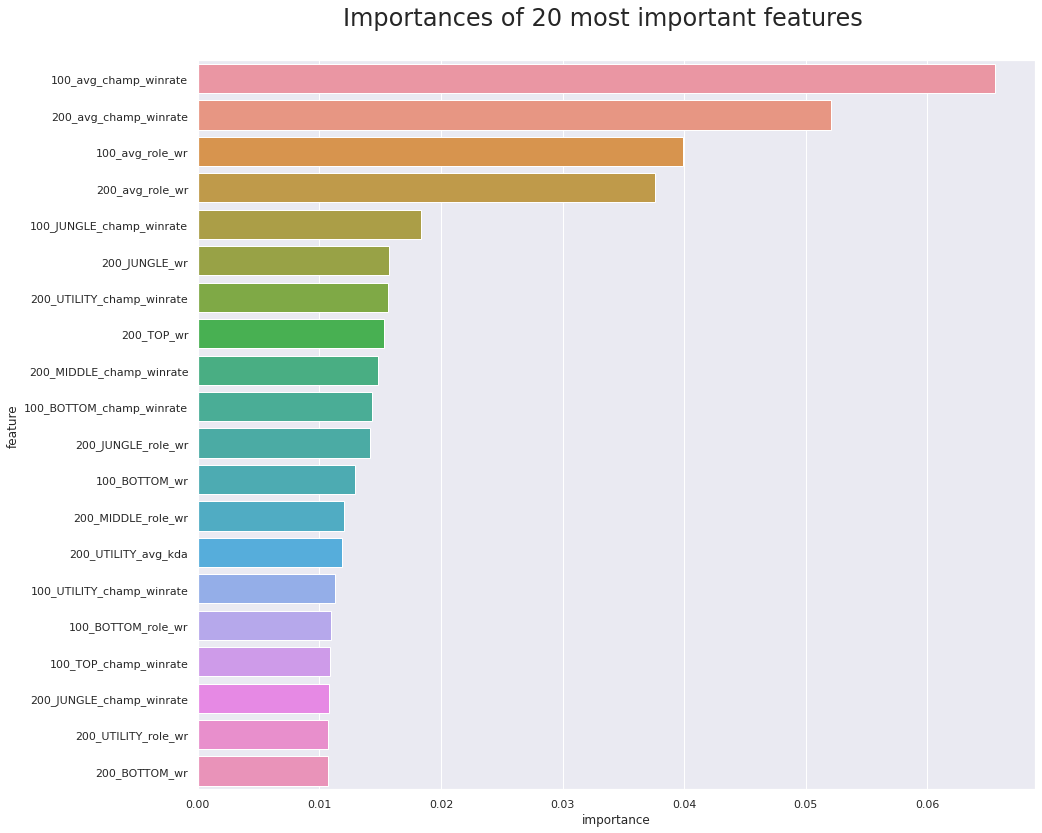

In [369]:
f = plt.figure(figsize=(15, 15))
idx = features["importance"].nlargest(20).index
tbl = features.loc[idx]
sns.barplot(data=tbl.sort_values(by="importance", ascending=False), x="importance", y="feature")
plt.subplots_adjust(top=0.8)
f.suptitle("Importances of 20 most important features", fontsize=24, x=0.5, y=0.85)
plt.show()

In [371]:
def get_variable_names(var):
  lst = []
  for team in ["100", "200"]:
    for role in ["TOP", "MIDDLE", "BOTTOM", "UTILITY", "JUNGLE"]:
      lst.append(team + "_" + role + "_" + var)
  return lst

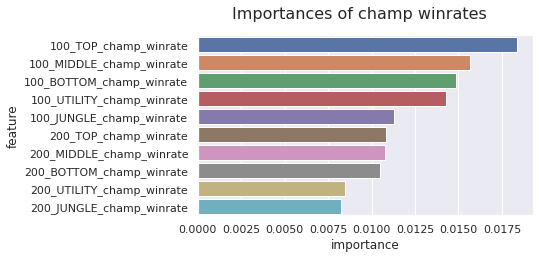

In [380]:
new_feats = features.set_index("feature")
f = plt.figure()
tbl = new_feats.loc[get_variable_names("champ_winrate")]
sns.barplot(data=tbl.sort_values(by="importance", ascending=False), x="importance", y=tbl.index)
plt.subplots_adjust(top=0.75)
f.suptitle("Importances of champ winrates", fontsize=16, x=0.5, y=0.85)
plt.show()

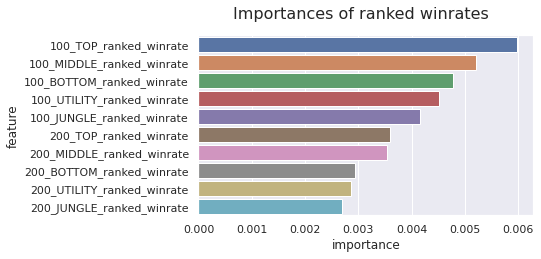

In [381]:
f = plt.figure()
tbl = new_feats.loc[get_variable_names("ranked_winrate")]
sns.barplot(data=tbl.sort_values(by="importance", ascending=False), x="importance", y=tbl.index)
plt.subplots_adjust(top=0.75)
f.suptitle("Importances of ranked winrates", fontsize=16, x=0.5, y=0.85)
plt.show()

## Second Model Attempt

Using the most correlated features only, no stats from the past 10 games, and using the best parameters found from gridsearchcv

in the past, this has led to worse results, because the variables I get rid of aren't really redundant, there's really no reason to get rid of them...

In [ ]:
object_type = df.dtypes == object
indexes_to_drop = object_type[object_type == True].index
y = df["winning_team"]
x = df.drop("winning_team", axis=1)
x.drop(indexes_to_drop, axis=1, inplace=True)

In [284]:
def get_variable_names(var):
  lst = []
  for team in ["100", "200"]:
    for role in ["TOP", "MIDDLE", "BOTTOM", "UTILITY", "JUNGLE"]:
      lst.append(team + "_" + role + "_" + var)
  return lst

In [289]:
var_lst = ["100_avg_champ_winrate", "200_avg_champ_winrate", "100_avg_role_wr", "200_avg_role_wr"] + get_variable_names("champ_winrate") + get_variable_names("role_wr") + get_variable_names("ranked_winrate") + get_variable_names("champ_games_played") + get_variable_names("role_total_played")

In [290]:
x = x.loc[:, var_lst]

In [291]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.33, random_state=42)

In [296]:
model_rf_fin = RandomForestClassifier(class_weight='balanced',
                                      criterion='gini',
                                      max_depth=None,
                                      max_features='log2',
                                      min_samples_leaf=0.007,
                                      min_samples_split=0.0075,
                                      n_estimators=190)
model_rf_fin.fit(x_train,y_train)

RandomForestClassifier(class_weight='balanced', max_features='log2',
                       min_samples_leaf=0.007, min_samples_split=0.0075,
                       n_estimators=190)

In [297]:
print('AUC Score = {:.4f}'.format(metrics.roc_auc_score(y_test, model_rf_fin.predict(x_test))))

AUC Score = 0.7888


In [343]:
features = pd.concat([pd.Series(model_rf_fin.feature_names_in_), pd.Series(model_rf_fin.feature_importances_)], axis=1)
features.rename(columns={0: "feature", 1: "importance"}, inplace=True)
features.sort_values(by="importance", ascending=False).head(20)

,feature,importance
0,100_avg_champ_winrate,0.129285
1,200_avg_champ_winrate,0.119459
2,100_avg_role_wr,0.070282
3,200_avg_role_wr,0.063221
12,200_UTILITY_champ_winrate,0.032104
8,100_JUNGLE_champ_winrate,0.031364
10,200_MIDDLE_champ_winrate,0.026862
23,200_JUNGLE_role_wr,0.026299
20,200_MIDDLE_role_wr,0.024407
4,100_TOP_champ_winrate,0.023418


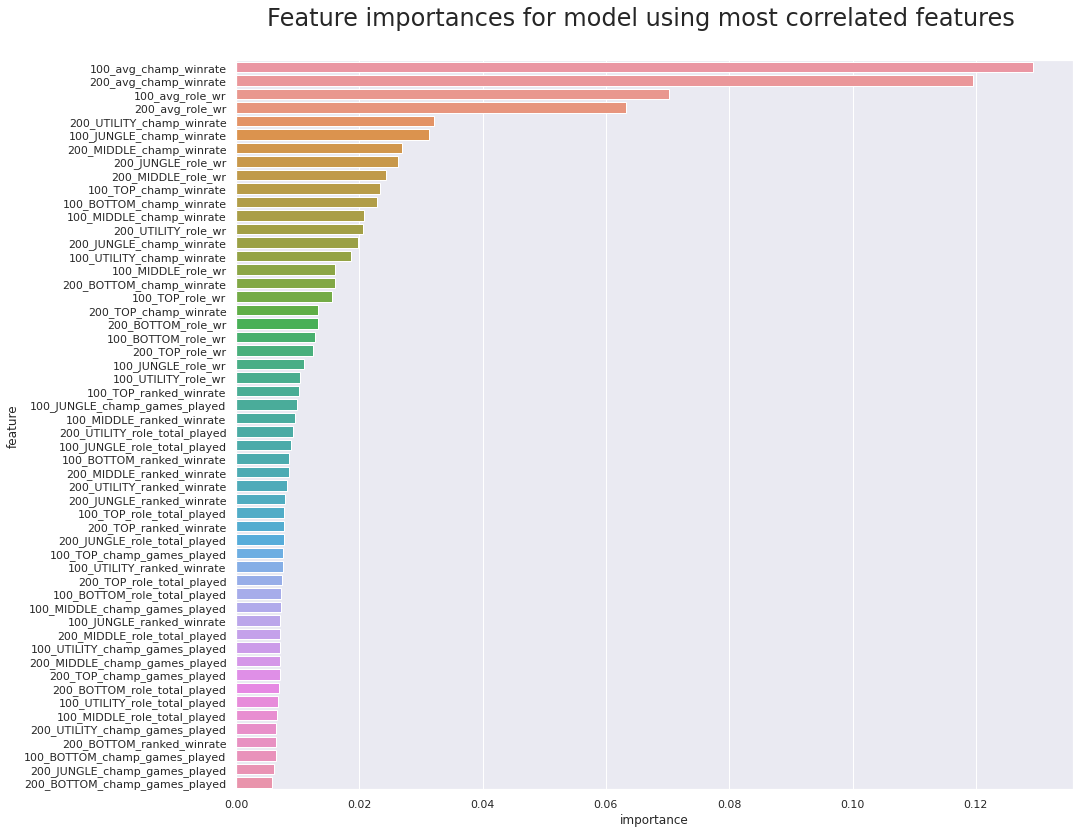

In [351]:
f = plt.figure(figsize=(15, 15))
sns.barplot(data=features.sort_values(by="importance", ascending=False), x="importance", y="feature")
plt.subplots_adjust(top=0.8)
f.suptitle("Feature importances for model using most correlated features", fontsize=24, x=0.5, y=0.85)
plt.show()

yeah I feel like limiting the data isn't very useful, especially when the other variables weren't noise variables or anything like that